# Deep Learning 2021
## Assignment 8 - Unsupervised Approaches


## 1. Autoencoders
Answer the following questions on autoencoders:

1. Is an Autoencoder for supervised learning or for unsupervised learning? Please explain your answer briefly.
2. What is the difference between an _Undercomplete_ and _Overcomplete_ Autoencoder?
3. What is the objective of Denoising Autoencoders and Contractive Autoencoders?
4. What is the similarity between autoencoder and PCA? How are the two different? What constrain would you apply to an autoencoder to make it similar to a PCA method?

#### Solution:
1. Autoencoder is for unsupervised learning, bacause it has encoder and decoder.Encoder learn the features of the original data, and decoder output it's reconstruction.
2. Hidden layer is Undercomplete if hidden layer is smaller than the input layer, hidden layer is Overcomplete if greater than the input layer.
3. They can learn the correlations of input's features.

## 2. GANs
Answer the following questions on GANs:

1. Give two examples of a Minimax Scenario outside Deep Learning and Computer Games.
2. Why is the discriminator trained with gradient ascent and not descent by default?
3. In practice, why it is not a good idea to learn parameters from the generator and discriminator at the same time?

### Solution:


## C1. Autoencoder
Your task is to train an autoencoder on the [FashionMNIST dataset](https://github.com/zalandoresearch/fashion-mnist) containing grayscale Zalando article images of 10 different categories. The data setup is already provided and should feel familiar from previous assignments. You should:

* Implement an autoencoder with the following architecture:
    * encoder: flatten the input, then apply two fully connected layers, one with 256 hidden neurons and the second one with 64 hidden neurons. Apply a ReLU after every fully connected layer.
    * decoder: symmetric to the encoder layers.

* Train the network for 20 epochs, with a learning rate of 0.001 and the Adam optimizer, using a mean-squared-error (MSE) input reconstruction loss. For each epoch, compute the train loss and eval loss (average over batches).

* Try to visualize some of the reconstructed images, for example by creating a modified version of the given `show_examples` function that additionaly plots the reconstructed image.


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw




Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw




Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw




Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw

Processing...
Done!
image of shape: torch.Size([1, 28, 28])
label: Trouser


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


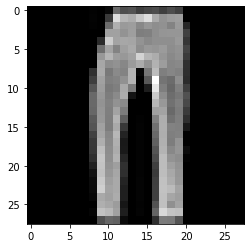

image of shape: torch.Size([1, 28, 28])
label: Pullover


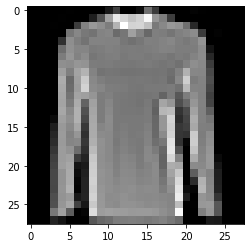

image of shape: torch.Size([1, 28, 28])
label: Trouser


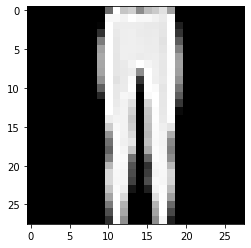

image of shape: torch.Size([1, 28, 28])
label: T-shirt/top


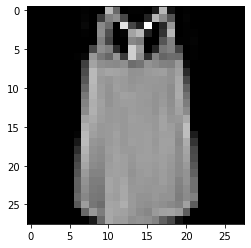

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt

train_dataset = torchvision.datasets.FashionMNIST(root=".", train=True, transform=torchvision.transforms.ToTensor(), download=True)
eval_dataset = torchvision.datasets.FashionMNIST(root=".", train=False, transform=torchvision.transforms.ToTensor(), download=True)

batch_size = 1024

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=2, shuffle=True)
eval_loader = torch.utils.data.DataLoader(eval_dataset, batch_size=batch_size, num_workers=2)

def show_examples(n):
    for i in range(n):
        index = torch.randint(0, len(train_dataset), size=(1,)).item() # select a random example
        image, target = train_dataset[index]
        print(f'image of shape: {image.shape}')
        print(f'label: {train_dataset.classes[target]}')
        plt.imshow(image.squeeze().numpy(), cmap='gray')
        plt.show()

show_examples(4)

In [2]:
# your solution goes here
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(64, 256),
            nn.ReLU(),
            nn.Linear(256, 28*28),
            nn.ReLU()
        )
    def forward(self, x):
        batch_size = x.size(0)
        x = self.encoder(x)
        x = self.decoder(x)
        out = x.view(batch_size, 1, 28, 28)
        return out


In [3]:
mynet = autoencoder()
optimizer = optim.Adam(mynet.parameters(), lr=0.001)
loss_function = nn.MSELoss()

In [4]:
for epoch in range(20):
    print("training epoch %d: " % epoch)
    train_loss = 0
    eval_loss = 0
    for step, (batch_x, batch_y) in enumerate(train_loader):
        

        output = mynet(batch_x)
        loss = loss_function(output, batch_x)
        train_loss = train_loss + loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    train_loss = train_loss / len(train_loader)
    print("train loss : %.4f" % train_loss)
    for step, (batch_x, batch_y) in enumerate(eval_loader):
        

        output = mynet(batch_x)
        loss = loss_function(output, batch_x)
        eval_loss = eval_loss + loss

    eval_loss = eval_loss / len(eval_loader)
    print("evalution loss : %.4f" % eval_loss)

training epoch 0: 
train loss : 0.0871
evalution loss : 0.0564
training epoch 1: 
train loss : 0.0460
evalution loss : 0.0400
training epoch 2: 
train loss : 0.0370
evalution loss : 0.0343
training epoch 3: 
train loss : 0.0329
evalution loss : 0.0320
training epoch 4: 
train loss : 0.0310
evalution loss : 0.0305
training epoch 5: 
train loss : 0.0299
evalution loss : 0.0296
training epoch 6: 
train loss : 0.0291
evalution loss : 0.0287
training epoch 7: 
train loss : 0.0282
evalution loss : 0.0276
training epoch 8: 
train loss : 0.0271
evalution loss : 0.0269
training epoch 9: 
train loss : 0.0266
evalution loss : 0.0265
training epoch 10: 
train loss : 0.0262
evalution loss : 0.0262
training epoch 11: 
train loss : 0.0259
evalution loss : 0.0259
training epoch 12: 
train loss : 0.0256
evalution loss : 0.0256
training epoch 13: 
train loss : 0.0254
evalution loss : 0.0251
training epoch 14: 
train loss : 0.0248
evalution loss : 0.0248
training epoch 15: 
train loss : 0.0244
evalution 

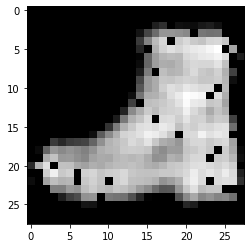

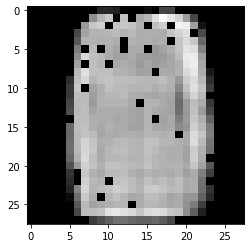

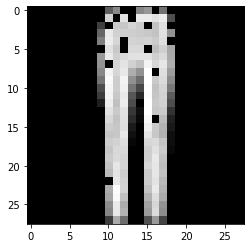

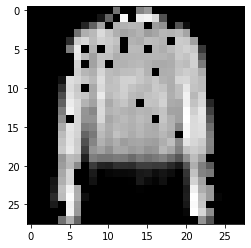

In [5]:
for step, (batch_x, batch_y) in enumerate(train_loader):
        #train
        #if(train_on_gpu):
        #    batch_x, batch_y = batch_x.cuda(), batch_y.cuda()
        #batch_x = batch_x.to(device)
        #batch_y = batch_y.to(device)

        output = mynet(batch_x)
        break

reconstruction = output

def show_examples(n):
    for i in range(n):
        index = torch.randint(0, len(reconstruction), size=(1,)).item() # select a random example
        image = reconstruction[index]
        plt.imshow(image.squeeze().detach().numpy(), cmap='gray')
        plt.show()

show_examples(4)


## C2. GAN
Train a Generative Adversarial Network to generate handwritten digits on the MNIST dataset. Again, the data setup is already given. The images are of size (1x28x28)
Your GAN should be built using the following components:
- A Generator that
    - as input, uses 100 dim latent vector sampled from a normal distribution around mean=0 and std=1.
    - has 5 fully connected layers, with dimensions 128->256->512->1024->28*28
    - applies 1d batch normalization after the first 4 layers
    - applies a LeakyReLU with a negative slope of 0.2 after the first 4 layers (after  batchnorm)
    - uses a Tanh activation after the last layer, to generate pixel values between -1 and 1.
- A Discriminator that
    - as input, takes an image of flattened size 28*28
    - has 3 fully connected layers, with dimensions 28*28->512->256->1
    - applies a LeakyReLU with a negative slope of 0.2 after the first 2 layers
    - uses a sigmoid activation after the last layer, to output probabilities between 0 and 1.

- Two optimizers, one for the generator and one for the discriminator. Use Adam with a learning rate of 0.001 and betas=(.5, .999).
- Binary Cross Entropy loss

Train your GAN for some epochs. For every batch you should:
- use a vector of zeros as your target vector indicating fake images
- use a vector of ones as your target vector indicating real images
- train the generator by 
    - sampling a random latent vector
    - generate a batch of fake images using the generator
    - compute the loss using the discriminators predictions. As groundtruth, use the label that indicates the images are real.
- train the discriminator by
    - computing the loss for both the generated fake images and the real images from the batch, using the corresponding target vectors.

Try to visualize some generated images every few epochs. 

Note: GANs are difficult to train. We will keep that in mind when grading your submissions.

11570
image of shape: torch.Size([1, 28, 28])
label: 3 - three


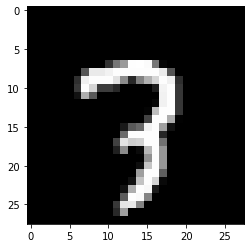

53819
image of shape: torch.Size([1, 28, 28])
label: 2 - two


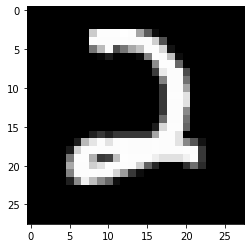

40490
image of shape: torch.Size([1, 28, 28])
label: 3 - three


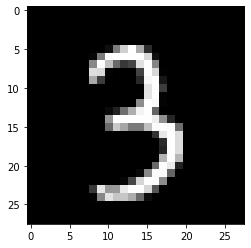

21051
image of shape: torch.Size([1, 28, 28])
label: 1 - one


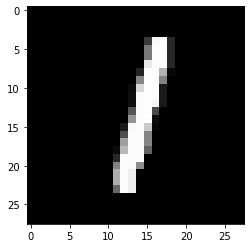

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision as tv
import matplotlib.pyplot as plt

batch_size = 64

tfms = tv.transforms.Compose([
    tv.transforms.ToTensor(),
    tv.transforms.Normalize(mean=[0.5], std=[0.5])
])

train_dataset = tv.datasets.MNIST(root='./mnist', train=True, transform=tfms, download=True)
classes = train_dataset.classes
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

def show_examples(n):
    for i in range(n):
        index = torch.randint(0, len(train_dataset), size=(1,)).item() # select a random example
        print(index)
        image, target = train_dataset[index]
        print(f'image of shape: {image.shape}')
        print(f'label: {classes[target]}')
        plt.imshow(image.squeeze().numpy(), cmap='gray')
        plt.show()

show_examples(4)

In [7]:
# your solution goes here
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc1 = nn.Sequential(
            nn.Linear(100, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.2)
        )
        self.fc2 = nn.Sequential(
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2)
        )
        self.fc3 = nn.Sequential(
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2)
        )
        self.fc4 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2)
        )
        self.fc5 = nn.Sequential(
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        out = self.fc5(x)
        return out


In [8]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.LeakyReLU(0.2)
        )
        self.fc2 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2)
        )
        self.fc3 = nn.Sequential(
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        out = self.fc3(x)
        return out

In [9]:
generator = Generator()
discriminator = Discriminator()

optimizer_gene = optim.Adam(generator.parameters(), lr=0.001, betas=(0.5, 0.999))
optimizer_dis = optim.Adam(discriminator.parameters(), lr=0.001, betas=(0.5, 0.999))

loss_function = nn.BCELoss()

In [10]:
def Gene_train(x, epoch, step):
    batch_size = x.size()[0]
    latend = torch.randn(batch_size, 100)
    fake_label = torch.ones(batch_size, 1) #to train generator
    gene_output = generator(latend)
    dis_output = discriminator(gene_output)

    gene_loss = loss_function(dis_output, fake_label)
    optimizer_gene.zero_grad()
    gene_loss.backward()
    
    optimizer_gene.step()

    if epoch % 3 == 0 and step % 300== 0:
        index = torch.randint(0, batch_size, size=(1,)).item()
        img = gene_output[index]
        img = img.view(1, 28, 28)
        plt.imshow(img.squeeze().detach().numpy(), cmap='gray')
        plt.show()


    return gene_loss




In [11]:
def Dis_train(x):
    batch_size = x.size()[0]
    x = x.view(-1, 28*28)
    real_label = torch.ones(batch_size, 1)
    dis_real_output = discriminator(x)
    dis_real_loss = loss_function(dis_real_output, real_label)


    latend = torch.randn(batch_size, 100)
    fake_label = torch.zeros(batch_size, 1)
    gene_fake_output = generator(latend)
    dis_fake_output = discriminator(gene_fake_output)
    dis_fake_loss = loss_function(dis_fake_output, fake_label)

    dis_loss = dis_real_loss + dis_fake_loss
    optimizer_gene.zero_grad()
    optimizer_dis.zero_grad()
    dis_loss.backward()
    optimizer_dis.step()

    return dis_loss


Training epoch 0


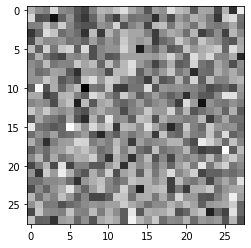

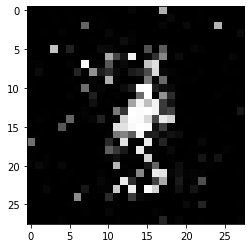

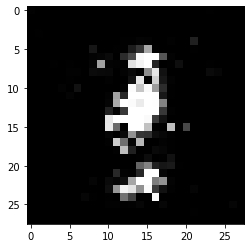

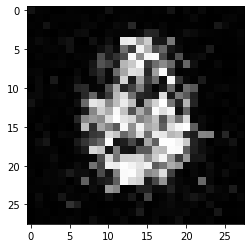

generator loss: 0.9854
discrominator loss 1.2920
Training epoch 1
generator loss: 1.0344
discrominator loss 1.2497
Training epoch 2
generator loss: 0.9564
discrominator loss 1.2691
Training epoch 3


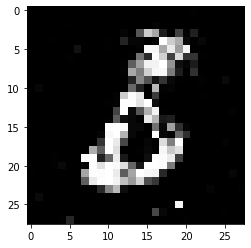

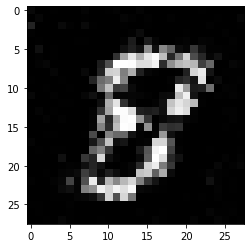

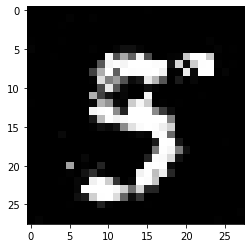

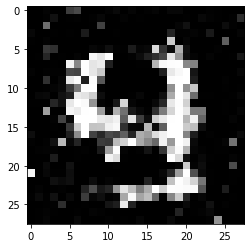

generator loss: 0.9603
discrominator loss 1.2639
Training epoch 4
generator loss: 0.9439
discrominator loss 1.2703
Training epoch 5
generator loss: 0.9218
discrominator loss 1.2844
Training epoch 6


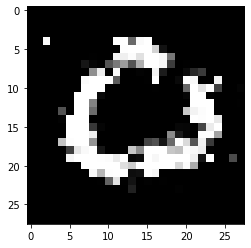

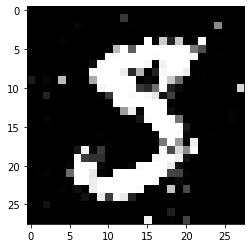

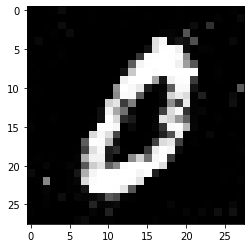

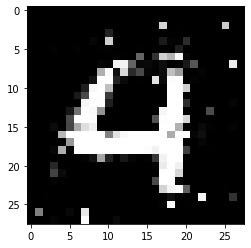

generator loss: 0.8930
discrominator loss 1.2969
Training epoch 7
generator loss: 0.8844
discrominator loss 1.3009
Training epoch 8
generator loss: 0.8773
discrominator loss 1.3065
Training epoch 9


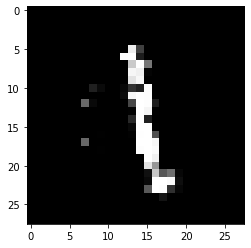

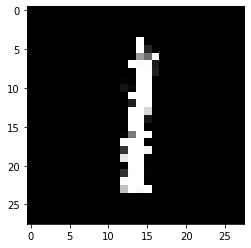

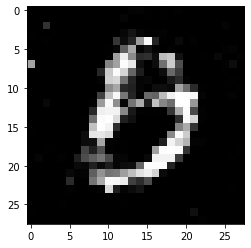

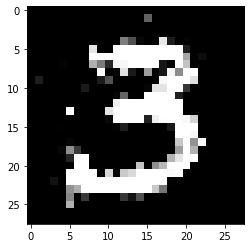

generator loss: 0.8688
discrominator loss 1.3113


In [12]:
for epoch in range(10):
    print("Training epoch %d" % epoch)
    gene_total_loss =0
    dis_total_loss =0
    for step, (batch_x, batch_y) in enumerate(train_loader):
        
        dis_total_loss = dis_total_loss + Dis_train(batch_x)
        gene_total_loss = gene_total_loss + Gene_train(batch_x, epoch, step)


    

    gene_total_loss = gene_total_loss / len(train_loader)
    dis_total_loss = dis_total_loss / len(train_loader)

    



    print("generator loss: %.4f" % gene_total_loss)
    print("discrominator loss %.4f" % dis_total_loss)
    